In [1]:
import os
import pandas as pd
import numpy as np
#from Tkinter import *
#import tkSnack
#root = Tk()
#tkSnack.initializeSnack(root)

import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
path = "c:/Python27/qp2_py/frechet_distance/current_results/"
allFiles = os.listdir(path)
for name in allFiles:
    fname = path+name
    distances = pd.read_csv(fname, sep="_", header=None)
#print distances

In [3]:
distances.columns= ["speakerID", "speakerIPU", "comp_speaker", "comp_speakerIPU","frechetdistance"]

In [ ]:
distances

### Divide the dataframe in half or so

In [6]:
split = 10
distances_test = distances[distances["speakerID"]< split]
distances_train = distances[distances["speakerID"]>=split]

In [5]:
distances_test

,speakerID,speakerIPU,comp_speaker,comp_speakerIPU,frechetdistance
0,0,0,1,0,65.249969
1,0,0,1,1,66.515404
2,0,0,1,2,274.112701
3,0,0,1,3,84.120514
4,0,0,1,4,157.210114
5,0,0,1,5,79.410965
6,0,0,1,6,66.920204
7,0,0,1,7,129.865005
8,0,0,1,8,87.305168
9,0,0,1,9,70.002014


In [ ]:
speakers = distances_train["speakerID"]

In [ ]:
distances_train.groupby(["speakerID"]).size()

### A little bit of notetaking code to make sure we aren't missing things.  Which we probably still are

In [ ]:
results = pd.read_csv("C:/Python27/qp2_py/frechet_distance/results_4_17.txt", sep="_", header=None)

In [ ]:
check = pd.read_csv("C:/Python27/qp2_py/frechet_distance/check_ipus.txt", sep=" ", header=None)

In [ ]:
check

In [ ]:
linecounts = [int(f) for f in list(check[1])]

In [ ]:
s1 = list(results[0])
s1_ipus = list(results[1])
s2 = list(results[2])
s2_ipus = list(results[3])

In [ ]:
comparisons = zip(s1, s1_ipus, s2, s2_ipus)

In [ ]:
comp_dict = {}
for comp in comparisons:
    comp_dict[comp] = True

In [ ]:
len(comparisons)

In [ ]:
sum(linecounts[:41])

In [ ]:
(367*6)+(740*6)

In [ ]:
for i in range(41):
    print i
    for j in range(linecounts[i]):
        for k in range(i+1, 41):
            for l in range(linecounts[k]):
                if k!= 26 and (i,j,k,l) not in comp_dict:
                    print (i,j,k,l)

### Import labels because that's important

In [4]:
labels = pd.read_csv("c:/Python27/qp2_py/labels/labels41_onlyqs.csv")

In [7]:
print labels

    Language
0    English
1    English
2    English
3    English
4   Mandarin
5   Mandarin
6   Mandarin
7   Mandarin
8    English
9   Mandarin
10   English
11   English
12   English
13   English
14  Mandarin
15   English
16   English
17   English
18  Mandarin
19   English
20   English
21   English
22   English
23  Mandarin
24   English
25  Mandarin
26  Mandarin
27  Mandarin
28  Mandarin
29  Mandarin
30  Mandarin
31  Mandarin
32  Mandarin
33  Mandarin
34  Mandarin
35  Mandarin
36  Mandarin
37  Mandarin
38  Mandarin
39  Mandarin
40   English


In [ ]:
labels.iloc[0]["Language"]

In [5]:
labs_test = labels.iloc[:10]["Language"]
labs_train = labels.iloc[10:]["Language"]

In [ ]:
labs_train

df.index = df.Year
df.loc[1913:1914]

In [ ]:
####To figure out how big my matrix should be
from collections import defaultdict
ipuID = defaultdict(lambda:{})
IDtoLabel = defaultdict(str)
count = 0
for item in distances_train.iterrows():
    speakerID =  item[1]["speakerID"]
    speakerIPU = item[1]["speakerIPU"]
    speakerID = int(speakerID)
    speakerIPU = int(speakerIPU)
    if speakerIPU not in ipuID[speakerID]:
        ipuID[speakerID][speakerIPU]=count
        IDtoLabel[count] = labels.iloc[speakerID][0]
        count +=1

In [ ]:
train_count = count

In [5]:
###### I fixed it!  I fixed something!!!
from collections import defaultdict
ipuID = defaultdict(lambda:{})
IDtoLabel = defaultdict(str)
count = 0
for item in distances.iterrows():
    speakerID =  item[1]["speakerID"]
    speakerIPU = item[1]["speakerIPU"]
    speakerID = int(speakerID)
    speakerIPU = int(speakerIPU)
    if speakerIPU not in ipuID[speakerID]:
        ipuID[speakerID][speakerIPU]=count
        IDtoLabel[count] = labels.iloc[speakerID][0]
        count +=1

In [ ]:
print IDtoLabel[0]

In [ ]:
count

In [ ]:
count**2

In [ ]:
###labels.iloc[speakID]["Language"]

In [6]:
dist_matrix = np.zeros([count,count])

In [12]:
test_matrix = np.zeros([count, count])

In [ ]:
dist_matrix = np.zeros([train_count,train_count])

In [ ]:
dist_matrix

In [7]:
for item in distances.iterrows():
    speakerID = item[1]["speakerID"]
    speakerIPU = item[1]["speakerIPU"]
    compared_speaker = item[1]["comp_speaker"]
    compared_IPU = item[1]["comp_speakerIPU"]
    distance = item[1]["frechetdistance"]
    if compared_IPU in ipuID[compared_speaker]:
        id1 = ipuID[speakerID][speakerIPU]
        id2 = ipuID[compared_speaker][compared_IPU]
        dist_matrix[id1,id2] = distance

In [26]:
distances_train

,speakerID,speakerIPU,comp_speaker,comp_speakerIPU,frechetdistance
227404,10,0,11,0,382.100067
227405,10,0,11,1,382.102020
227406,10,0,12,0,382.100006
227407,10,0,12,1,382.100464
227408,10,0,12,2,382.100281
227409,10,0,12,3,195.033386
227410,10,0,12,4,382.104828
227411,10,0,12,5,382.103577
227412,10,0,12,6,382.100708
227413,10,0,12,7,181.180832


In [9]:
####### trying to train the matrix on half of the data
###### this does not work.  When I try to do this, nothing fills in, it seems - my entire matrix is zeros.
#### or quite possible, too much of the matrix is zeros
for item in distances_train.iterrows():
    speakerID = item[1]["speakerID"]
    speakerIPU = item[1]["speakerIPU"]
    compared_speaker = item[1]["comp_speaker"]
    compared_IPU = item[1]["comp_speakerIPU"]
    distance = item[1]["frechetdistance"]
    if compared_IPU in ipuID[compared_speaker]:
        id1 = ipuID[speakerID][speakerIPU]
        id2 = ipuID[compared_speaker][compared_IPU]
        dist_matrix[id1,id2] = distance

In [ ]:
dist_matrix

In [18]:
dist_matrix.argmax()

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
#### In case this was the transform, which if def is not
dist2 == dist_matrix.T

### In which I try to fill the rest of these zeroes with the inverse?

In [ ]:
print len(dist_matrix)
print len(dist_matrix[0])

In [8]:
dist2 = dist_matrix
#dist2 = distances_train

In [9]:
for i in range(len(dist_matrix)):
    for j in range(len(dist_matrix[0])):
        dist2[j][i]=dist_matrix[i][j]

In [ ]:
### no no no no this is wrong do not do this this is wrong delete delete delete ####
for i in range(len(distances_train)):
    print distances_train[i]
    break
    for j in range(len(distances_train[0])):
        dist2[j][i]=distances_train[i][j]

In [16]:
dist2

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [ ]:
#### why is this just printing out gibberish?  I would 
#np.save("c:/Python27/qp2_py/frechet_distance/dist_matrix_1207.txt", dist_matrix, allow_pickle=False)
np.savetxt("c:/Python27/qp2_py/frechet_distance/dist_matrix_1207.txt", dist_matrix)

infile = open("c:/Python27/qp2_py/frechet_distance/half_matrix.txt", "r")
in_matrix = np.load(infile)

In [ ]:
#infile = open("c:/Python27/qp2_py/frechet_distance/half_matrix.txt", "r")
#in_matrix = np.load(infile)

In [ ]:
#in_matrix

In [ ]:
##### try scaling from the book, to make the matrix more compact- results in a single cluster, which is no good
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dist_matrix)
dist_scaled = scaler.transform(dist_matrix)

In [ ]:
dist_scaled

In [ ]:
## 4/26 retry with assistence from The Book
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 2.0, metric="precomputed")
clusters = dbscan.fit_predict(dist_matrix)

In [ ]:
print format(clusters)

In [ ]:
### for Book format only
cluster_labels = clusters

In [ ]:
import matplotlib.cm as mcm
plt.scatter(dist_matrix[:,0], dist_matrix[:1], c=clusters, cmap = mcm.viridis)

In [ ]:
import matplotlib.cm as mcm
plt.scatter(dist_scaled[:,0], dist_scaled[:1], c=clusters, cmap = mcm.viridis)

### Clustering, as we've been doing

In [10]:
from sklearn.cluster import DBSCAN

cluster = DBSCAN(eps = 2.0, metric="precomputed")
cluster.fit(dist_matrix)

DBSCAN(algorithm='auto', eps=2.0, leaf_size=30, metric='precomputed',
    min_samples=5, n_jobs=1, p=None)

In [21]:
dist_matrix

array([[  0.      ,   0.      ,   0.      , ...,  69.01545 ,  67.204994,
         59.195515],
       [  0.      ,   0.      ,   0.      , ...,  84.960052,  84.960075,
         84.960602],
       [  0.      ,   0.      ,   0.      , ...,  61.030792,  55.655983,
         54.380981],
       ..., 
       [ 69.01545 ,  84.960052,  61.030792, ...,   0.      ,   0.      ,
          0.      ],
       [ 67.204994,  84.960075,  55.655983, ...,   0.      ,   0.      ,
          0.      ],
       [ 59.195515,  84.960602,  54.380981, ...,   0.      ,   0.      ,
          0.      ]])

(array([  77513.,  205502.,  581182.,  228776.,  186986.,  110102.,
          49140.,   22776.,    7448.,    1944.]),
 array([   0.       ,   48.4970001,   96.9940002,  145.4910003,
         193.9880004,  242.4850005,  290.9820006,  339.4790007,
         387.9760008,  436.4730009,  484.970001 ]),
 <a list of 10 Patch objects>)

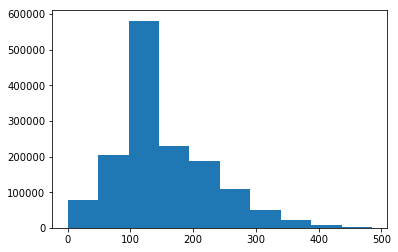

In [34]:
%matplotlib inline
plt.hist(dist_matrix.flatten())

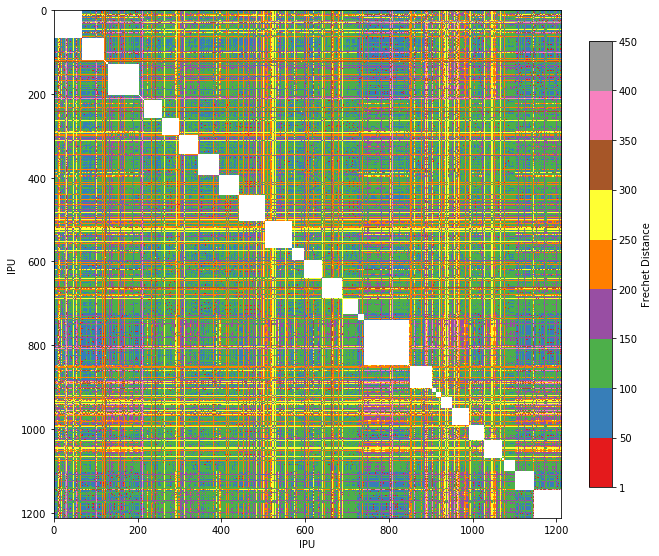

In [59]:
import matplotlib.cm as mcm
import matplotlib.colors as mcolors

norm = mcolors.Normalize(vmin=0.001)
bins = np.arange(0,500,50)
bins[0] = dist_matrix[dist_matrix>0].min()

cmap = mcm.viridis
cmap = mcm.Set1
norm = mcolors.BoundaryNorm(bins, cmap.N)
cmap.set_under("White")
fig, ax = plt.subplots(figsize=(10,10))
R=50
#clusterR = np.repeat(cluster_map, R, axis=0)
#sm = ax.imshow(clusterR, cmap=mcm.Greys)
sm = ax.imshow(dist_matrix, cmap=cmap, norm=norm)
ax.set_xlabel("IPU")
ax.set_ylabel("IPU")
#ax.set_yticks(np.arange(R/2, clusterR.shape[0],R))
#ax.set_yticklabels(clabels)
cb = fig.colorbar(sm, ax=ax, fraction=.04)
cb.set_label("Frechet Distance")
#ax.set_title("IPUs Assigned to Clusters Based on Frechet Distances")

(array([  58950.,   33000.,  759750.,  567850.,  178100.,   67000.,
          21050.,   10050.,    1250.,    1200.]),
 array([   0.       ,   48.4970001,   96.9940002,  145.4910003,
         193.9880004,  242.4850005,  290.9820006,  339.4790007,
         387.9760008,  436.4730009,  484.970001 ]),
 <a list of 10 Patch objects>)

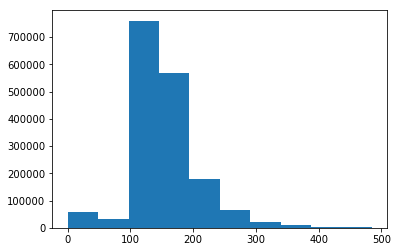

In [36]:
plt.hist(clusterR.flatten())

In [11]:
len(cluster.labels_)

1213

In [12]:
cluster_labels = cluster.labels_

In [13]:
print cluster_labels

[ 0  0  0 ..., 26 26 26]


In [23]:
np.unique(cluster_labels)

array([0], dtype=int64)

In [14]:
print cluster.labels_

[ 0  0  0 ..., 26 26 26]


In [16]:
print min(cluster.labels_)
print max(cluster.labels_)

-1
26


In [15]:
length_cluster_labels = max(cluster.labels_)
cluster_labels = cluster.labels_

In [ ]:
print len(cluster_labels)

In [76]:
max(cluster_labels)

26

In [17]:
for i in range(len(cluster_labels)):
    if cluster_labels[i]==-1:
        cluster_labels[i]=27

## In which we try to create some visualizations of the cluster features
- Note (4/5): When I try to do this with my better distance matrix (halved, and then adding in all of the 0 features with the other half, this breaks - says that the first argument of bincount must be non-negative?  But it's 0, so I don't know what is happening here.

In [18]:
np.bincount(cluster_labels)

array([ 67,  53,   6,  75,  45,  49,  46,  50,  47,  61,  65,  29,  42,
        49,  34,  15, 107,  52,  11,  27,  42,  34,  44,   5,  26,  45,
        66,  21], dtype=int64)

In [19]:
## code by Hannah to get the cluster labels
cluster_map = np.empty((cluster_labels.max()+1, dist_matrix.shape[1]))
clabels = np.unique(cluster_labels)
for label, count in zip(np.unique(cluster_labels), np.bincount(cluster_labels)):
       cluster_map[label:,:] = (dist_matrix[cluster_labels==label].mean(axis=0))

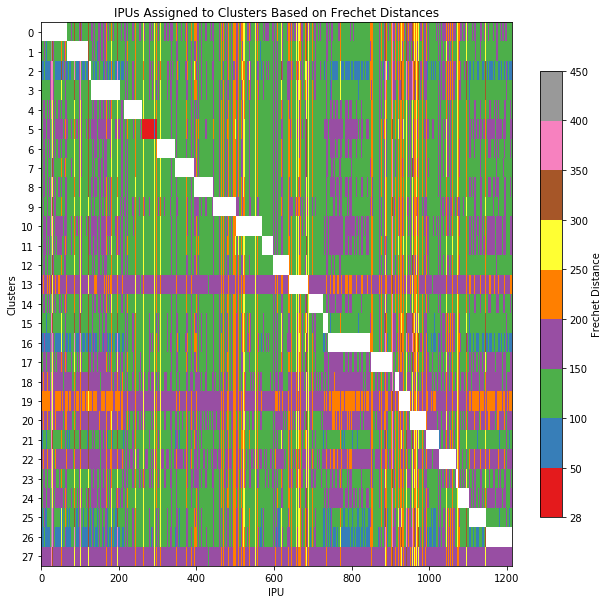

In [54]:
## makes a heatmap of the ipu distances, and the clusters
import matplotlib.cm as mcm
import matplotlib.colors as mcolors

norm = mcolors.Normalize(vmin=0.001)
bins = np.arange(0,500,50)
bins[0] = clusterR[clusterR>0].min()

cmap = mcm.viridis
cmap = mcm.Set1
norm = mcolors.BoundaryNorm(bins, cmap.N)
cmap.set_under("White")
fig, ax = plt.subplots(figsize=(10,10))
R=50
clusterR = np.repeat(cluster_map, R, axis=0)
#sm = ax.imshow(clusterR, cmap=mcm.Greys)
sm = ax.imshow(clusterR, cmap=cmap, norm=norm)
ax.set_xlabel("IPU")
ax.set_ylabel("Clusters")
ax.set_yticks(np.arange(R/2, clusterR.shape[0],R))
ax.set_yticklabels(clabels)
cb = fig.colorbar(sm, ax=ax, fraction=.04)
cb.set_label("Frechet Distance")
ax.set_title("IPUs Assigned to Clusters Based on Frechet Distances")

#cb.set_ticks
#cb.set_ticklabels


In [40]:
histo = np.bincount(cluster_labels)
print histo

[ 67  53   6  75  45  49  46  50  47  61  65  29  42  49  34  15 107  52
  11  27  42  34  44   5  26  45  66  21]


In [ ]:
sum(histo)

### Notes (3/17/17)
- More than half of our data (53.60%) is being assigned to one cluster (in this case, cluster 13)
    - I would LOVE to see the labels of what's being assigned to that cluster...

In [ ]:
plt.figure()
plt.title("Number of IPUs assigned to each cluster")
plt.xlabel("Cluster number")
plt.ylabel("# of IPUs assigned to cluster")
plt.hist(cluster_labels, bins=5)

In [ ]:
print cluster_labels

### In which Pablo writes some code to organize feautres by speaker

In [ ]:
#This is the code that collects the speaker based feature vectors
#This will contain one feature vector per speaker
speakerFeatures=[]
# THis has the corresponding labels in the same order
speakerLabels=[]
clusternumber=max(cluster_labels)+1
for speakID in ipuID:
    full=0
    thisFeatVect=np.zeros(clusternumber)
    for ipu in ipuID[speakID]:
        #get the number for the IPU
        ident=ipuID[speakID][ipu]
        #get the cluster to which it belongs
        cluster=cluster_labels[ident]
        if cluster!=-1:
        #add 1 to the count of that cluster
            thisFeatVect[cluster-1]+=1
            full+=1
        else:
            thisFeatVect[24]+=1
            full+=1
        
    #normalize the counts
    normFeatVect=[]
    #print len(thisFeatVect)
    for item in thisFeatVect:
        item=(item*1.0)/full
        normFeatVect.append(item)
    speakerFeatures.append(normFeatVect)
    label=labels.iloc[speakID]["Language"]
    speakerLabels.append(label)

In [ ]:
###ONLY RUN THIS ONCE, DUMMY
print len(speakerLabels)
print len (speakerFeatures)
speakerFeatures=speakerFeatures[:-1]
speakerLabels = speakerLabels[:-1]


In [ ]:
len(speakerFeatures)

### NOTE: talk to Pablo about what this did / does

### In which I try to make some percentage features (percentage of ipus assigned to each cluster), and this feature doesn't work as well as using the cluster labels themselves?  Does that make sense?

In [ ]:
for i in cluster.labels_:
    print i

In [ ]:
percentage_out = []
for item in histo:
    percentage_out.append(item/float(histo.sum()))
    
print (percentage_out)

In [ ]:
## what percentage of ipus are in each cluster?  still not speaker based, I don't think there's a way to do that
percent_features = []
for i in range(len(percentage_out)):
    percentage = [percentage_out[i]]
    multiplier = histo[i]
    outlist = percentage*multiplier
    for item in outlist:
        percent_features.append(item)

print len(percent_features)
    
    

In [ ]:
ipu_percentages = [[feat] for feat in percent_features]

In [ ]:
x = [3]
print x*3

### A little bit of shit code below - notes from changing things to speaker based from before, but I can't really do that here, I don't think.
    

speaker_ipu_histograms = []
for speaker in all_ipu_coefs:
    scaled_ipu = scaler.transform(speaker)
    ipu_centers = cluster.predict(scaled_ipu)
    histo = np.bincount(ipu_centers, minlength=cluster.n_clusters) #set to to the clusteres we specificied before 
    #histo = np.bincount(ipu_centers, minlength=cluster.n_clusters) #set to to the clusteres we specificied before 
    speaker_ipu_histograms.append(histo / float(histo.sum()))

only_legendre = pd.DataFrame(speaker_ipu_histograms, columns=["cluster%d" % i for i in range(70)])
print only_legendre

### Below makes a feature vector using just the label of the cluster as a feature

In [41]:
features = [ [feat] for feat in cluster_labels ]

In [83]:
print features

[[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [27], [27], [27], [2], [2], [2], [2], [2], [2], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [

In [42]:
clf_labels = [IDtoLabel[i]for i in range(len(features))]

In [ ]:
print clf_labels

### Here, we make more visualizations of the data (useful histograms)

In [43]:
langlab = zip(clf_labels, cluster_labels)
import collections
c = dict(collections.Counter(langlab))

In [44]:
lcounts = {'English':np.zeros(clabels.max()+1), 'Mandarin':np.zeros(clabels.max()+1)}

In [45]:
for ((lang, clust), count) in c.items():
    lcounts[lang][clust] = count
   

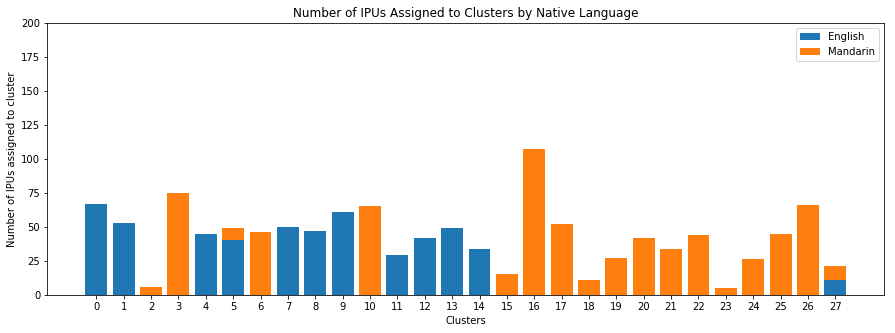

In [57]:
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(clabels, lcounts['English'], label="English")
ax.bar(clabels, lcounts['Mandarin'], bottom=lcounts['English'], label="Mandarin")
ax.set_xticks(clabels)
ax.legend()
ax.set_ylim((0,200))
ax.set_xlabel("Clusters")
ax.set_ylabel("Number of IPUs assigned to cluster")
ax.set_title("Number of IPUs Assigned to Clusters by Native Language")

In [89]:
lcounts

{'English': array([ 67.,  53.,   0.,   0.,  45.,  40.,   0.,  50.,  47.,  61.,   0.,
         29.,  42.,  49.,  34.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  11.]),
 'Mandarin': array([   0.,    0.,    6.,   75.,    0.,    9.,   46.,    0.,    0.,
           0.,   65.,    0.,    0.,    0.,    0.,   15.,  107.,   52.,
          11.,   27.,   42.,   34.,   44.,    5.,   26.,   45.,   66.,   10.])}

In [40]:
print len(features),len(clf_labels)

1213 1213


In [ ]:
print len(speakerFeatures[0])

In [ ]:
count = 0
thirteen_labels = []
for i in range(len(features)):
    if features[i][0]==13:
        labs = clf_labels[i]
        thirteen_labels.append(labs)
print thirteen_labels

#### More analysis, 3/17/17 
Holy crap.  Apart from cluster 13, each other cluster contains it in only IPUs with the same label.  Each other cluster is 100% labeled as English or labeled as Mandarin.  That is pretty damn cool.
What are we clustering by again?  IPU distance?  So the centers are distances, I think?  This is showing us a lot of solid, strong evidence that the distances are clusterable.  

53.6% of our data (so like 54% of our data / our distances) are being assigned to cluster 13.  Within cluster 13, English labels (ipu distances) make up 54.71% of that cluster, and Mandarin labels (ipu distances) make up 45.29% of that cluster.  Slight majority to English, but I bet that we could super cut this down.

What might this mean?
- This could mean that cluster 13 is where our distances are similar - they *are* all speaking English, after all
- This could also mean that this is where some of our distance computing errors might be (halving/doubling errors in computing distancs might make some of the distances between native and non-native language groups look more similar)
- This indicates that for slightly less than half of our data (approx 46%), the distances between native and non-native question contours are VERY SEPERABLE - different enough that they are getting assigned to different clusters, and these clusters are contain strictly within-label distances.  

## NOTE:
As of 3/17/17, IPU only cluster features give us 78% accuracy.  Just to verify this all still is working.  78% is not bad.

In [ ]:
eng_count = 0
man_count = 0
for item in thirteen_labels:
    if item[0] == "E":
        eng_count = eng_count+1
    else:
        man_count = man_count+1
        
eng_percent = float(eng_count)/len(thirteen_labels)
man_percent = float(man_count)/len(thirteen_labels)

print eng_percent
print man_percent

In [63]:
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import ShuffleSplit

C:\Users\Rachel\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [90]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}



#param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
#rom sklearn.svm import LinearSVC
grid_search = GridSearchCV(SVC(), param_grid, cv=10)

#X_train, X_test, y_train, y_test = train_test_split(features, clf_labels, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(features, clf_labels, random_state=0)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 0.1, 'gamma': 1}
0.984598459846


In [61]:
####print len(speakerFeatures)

In [ ]:
from sklearn.preprocessing 

In [64]:
from sklearn.svm import SVC
classifier = SVC(C=0.1, gamma=1)
from sklearn.cross_validation import ShuffleSplit
from sklearn.cross_validation import cross_val_score
shuffle_split = ShuffleSplit(1213, n_iter= 10, test_size=.25, train_size=.75)
shuffle_score = cross_val_score(classifier, features, clf_labels, cv=shuffle_split)
print shuffle_score
print shuffle_score.mean()

[ 0.97039474  0.97368421  0.99342105  0.98026316  0.98355263  0.99013158
  0.97697368  0.98684211  0.98026316  0.97039474]
0.980592105263


In [44]:
from sklearn.svm import SVC
classifier = SVC(C=1, gamma = 10)

X_train, X_test, y_train, y_test = train_test_split(features, clf_labels, random_state=0)
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
print score

0.980263157895


In [ ]:
count_Eng = 0
count_Man = 0
total_Eng = 0
total_Man= 0
count_full = 0
total_instances=0
man_dist = []
eng_dist = []
full_dist = []
for i in range(len(dist_matrix)):
    for j in range(len(dist_matrix)):
        if IDtoLabel[i]==IDtoLabel[j]:
            if IDtoLabel[i]=="English":
                count_Eng+= dist_matrix[i][j]
                eng_dist.append(dist_matrix[i][j])
                total_Eng+=1
            else:
                count_Man+= dist_matrix[i][j]
                man_dist.append(dist_matrix[i][j])
                total_Man+=1
        count_full+= dist_matrix[i][j]
        total_instances+=1
        full_dist.append(dist_matrix[i][j])

        

In [ ]:
avg_dist_Eng = count_Eng/float(total_Eng)
avg_dist_Man = count_Man/float(total_Man)
avg_dist = count_full/float(total_instances)

## Summary of results (speaker-based features) (8/30)
Why haven't I written this into my paper yet?  When did I do this?  I have 0 memory of this but that isn't necessary surprising.  Saves me work, though!  I believe me.
- With an eps of 2.0, we get 23 clusters, which is very close to creating one cluster per speaker.  By creating a binary feature vector, assigning each speaker to a cluster, we do pretty badly - hovering around 50% accuracy.  
- Eps of 6.0, we do better - 8 clusters, 63% accurate.  But this is still not as good as just using the clusters as binary features on their own.


## (6/29) SUMMARY OF RESULTS (with all but 7 of the IPUs).
### NOTE: STILL MAY NOT BE TOTALLY CORRECT (check distance matrix and frechet distances, results are still suspiciously high)
NOTE:  This is with an eps of 2.0
- English IPUs are closer to each other than to random distances
- English IPUs are closer to each other than Mandarin IPUs
- Mandarin IPUs are also closer to each other than they are to random distances
- All of this is statistically significant

In [ ]:
print avg_dist_Eng
print avg_dist_Man
print avg_dist

In [ ]:
from scipy.stats import ttest_ind
p_eng = ttest_ind(eng_dist, full_dist)
p_man = ttest_ind(man_dist,full_dist)
print p_eng
print p_man

In [ ]:
distance_labels = pd.DataFrame

In [ ]:
type(labels.iloc[5])

count = 0
for item in distances.iterrows():
    speakerID =  item[1][1]
    if speakersID == count:
        lab = label.iloc[count][0]
        distance_labels.append(lab)
    else:

In [66]:
cross_val_score?